Segmentation Customer Model
by: César Álvarez

Introducción:
El objetivo de este proyecto de ciencia de datos es segmentar la base de clientes de una tienda minorista. Mediante un enfoque no supervisado, buscamos agrupar a los clientes en segmentos significativos para que el equipo de marketing pueda diseñar y ejecutar estrategias personalizadas y altamente efectivas.

Para lograrlo, se implementó un proceso de ETL (Extracción, Transformación y Carga) que se centró en la creación de métricas de negocio clave. A partir de los datos transaccionales, se derivaron las variables del marco RFM (Recencia, Frecuencia, Monto Monetario), un estándar en el análisis de clientes.

- Recencia: Tiempo transcurrido desde la última compra.
- Frecuencia: Número total de compras.
- Monto Monetario: Gasto total del cliente.

In [ ]:
#Instalación de las librerias que se usaran.
pip install pandas numpy scikit-learn matplotlib seaborn

In [11]:
import pandas as pd 


In [12]:
df_ventas = pd.read_csv("SampleSuperstore.csv")
df_ventas

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [13]:
#Recencia
df_ventas['Order Date'] = pd.to_datetime(df_ventas['Order Date'])

fecha_ref = max(df_ventas['Order Date'])

df_recencia = df_ventas.groupby('Customer ID')['Order Date'].max().reset_index()

df_recencia['Recencia'] = (fecha_ref - df_recencia['Order Date']).dt.days

In [16]:
#Frecuencia y monto
df_rfm = df_ventas.groupby('Customer ID').agg(
    Frecuencia = ('Order ID', 'count'),
    Monto = ('Sales', 'sum')
).reset_index()

In [17]:
#Unificación en un solo dataset
df_final = df_rfm.merge(df_recencia[['Customer ID', 'Recencia']], on='Customer ID')
df_final

,Customer ID,Frecuencia,Monto,Recencia
0,AA-10315,11,5563.560,184
1,AA-10375,15,1056.390,19
2,AA-10480,12,1790.512,259
3,AA-10645,18,5086.935,55
4,AB-10015,6,886.156,415
...,...,...,...,...
788,XP-21865,28,2374.658,43
789,YC-21895,8,5454.350,4
790,YS-21880,12,6720.444,9
791,ZC-21910,31,8025.707,54


Metodología y Modelo 
Se seleccionó K-Means como el algoritmo de clustering principal. Este modelo es una excelente elección por su sencillez, eficiencia y su capacidad para crear clústeres bien definidos y fáciles de interpretar.

Para determinar el número óptimo de clústeres (k), se exploraron métodos como el del codo y el de la silueta.  Dado que el método del codo no arrojó un k claro, se optó por el método de la silueta, que ofrece una métrica más precisa para evaluar la cohesión y separación entre los clústeres. Una vez definido el número de clústeres, se procedió a entrenar el modelo.


In [19]:
#K-means
from sklearn.preprocessing import StandardScaler
df_final.rename(columns={'Order ID': 'order_id'}, inplace=True)

X = df_final[['Recencia','Frecuencia','Monto']]

scaler = StandardScaler()

x_Scaled = scaler.fit_transform(X)

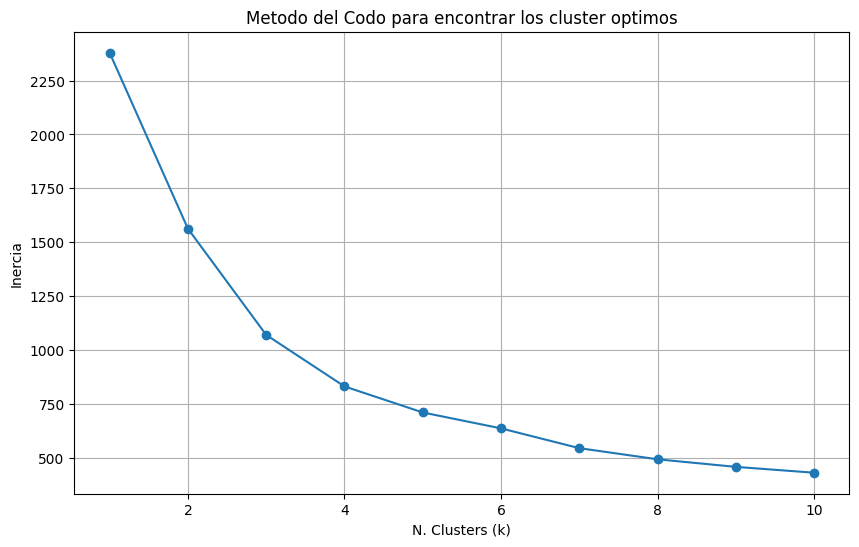

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inercia = []

k_range = range(1,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    kmeans.fit(x_Scaled)

    inercia.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.plot(k_range, inercia, marker='o')
plt.title('Metodo del Codo para encontrar los cluster optimos')
plt.xlabel('N. Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

Como el K optimo no es muy claro, se usará el metodo de la silueta para contrar el mejor K.

In [27]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2,12):

    kmeans = KMeans(n_clusters=k)

    labels = kmeans.fit_predict(x_Scaled)

    silhouette_avg = silhouette_score(x_Scaled,labels)

    silhouette_scores.append(silhouette_avg)

best_k = 2 + silhouette_scores.index(max(silhouette_scores))

print(f"El mejor K es: {best_k}")


El mejor K es: 3


Ya definido el numero de clusters ahora continuamos con el entrenamiento del modeo. 

In [28]:
#Entrenamiento
k_optimo = 3
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init='auto')
kmeans_final.fit(x_Scaled)

df_final['Cluster'] = kmeans_final.labels_

print("DataFrame con la columna de clústeres asignada:")
print(df_final.head())

DataFrame con la columna de clústeres asignada:
  Customer ID  Frecuencia     Monto  Recencia  Cluster
0    AA-10315          11  5563.560       184        0
1    AA-10375          15  1056.390        19        0
2    AA-10480          12  1790.512       259        0
3    AA-10645          18  5086.935        55        2
4    AB-10015           6   886.156       415        1


In [29]:
df_final

,Customer ID,Frecuencia,Monto,Recencia,Cluster
0,AA-10315,11,5563.560,184,0
1,AA-10375,15,1056.390,19,0
2,AA-10480,12,1790.512,259,0
3,AA-10645,18,5086.935,55,2
4,AB-10015,6,886.156,415,1
...,...,...,...,...,...
788,XP-21865,28,2374.658,43,2
789,YC-21895,8,5454.350,4,0
790,YS-21880,12,6720.444,9,2
791,ZC-21910,31,8025.707,54,2


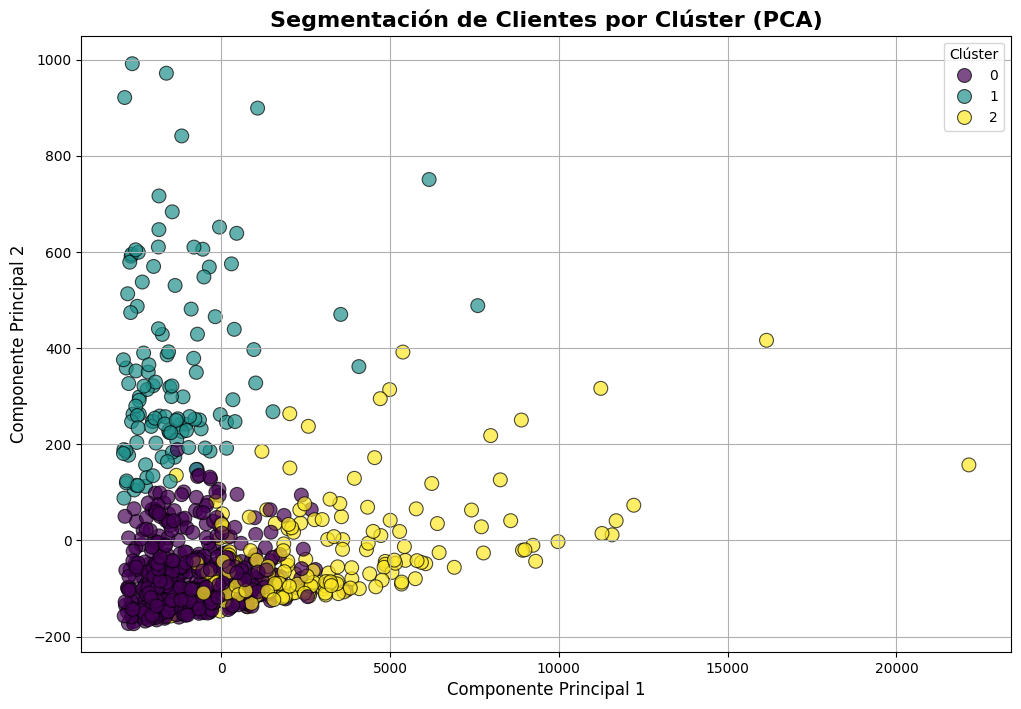

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X_scaled = df_final[['Recencia', 'Frecuencia', 'Monto']]
pca = PCA(n_components=2)

pca_components = pca.fit_transform(X_scaled)

df_final['PCA1'] = pca_components[:, 0]
df_final['PCA2'] = pca_components[:, 1]


plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    data=df_final, 
    hue='Cluster', 
    palette='viridis',
    s=100, 
    alpha=0.7, 
    edgecolor='k'
)

plt.title('Segmentación de Clientes por Clúster (PCA)', fontsize=16, fontweight='bold')
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Clúster', loc='best')
plt.grid(True)
plt.show()

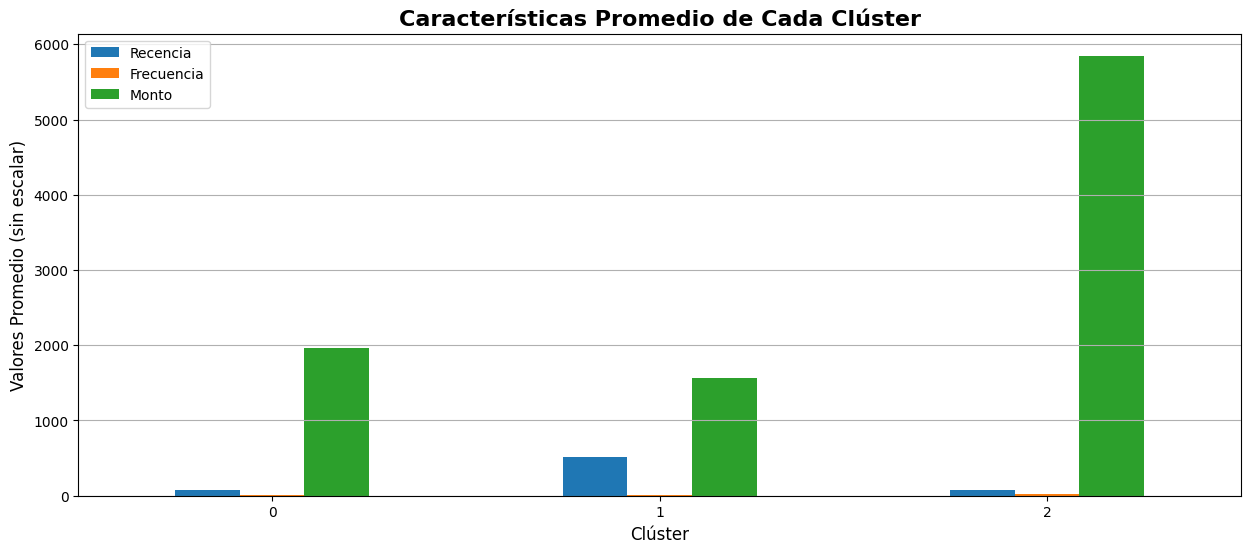

In [32]:
cluster_analysis = df_final.groupby('Cluster')[['Recencia', 'Frecuencia', 'Monto']].mean().reset_index()

cluster_analysis.plot(x='Cluster', kind='bar', figsize=(15, 6), rot=0)
plt.title('Características Promedio de Cada Clúster', fontsize=16, fontweight='bold')
plt.ylabel('Valores Promedio (sin escalar)', fontsize=12)
plt.xlabel('Clúster', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Análisis de los Clústeres:
El modelo fue capaz de identificar tres segmentos de clientes con características de comportamiento bien diferenciadas. A partir del análisis de las variables RFM promedio de cada clúster, se derivaron las siguientes clasificaciones:

- Clúster 0: Clientes de Alto Potencial
Este grupo se caracteriza por una recencia y frecuencia bajas, pero un monto monetario elevado. Esto sugiere que son clientes que realizaron una compra grande recientemente. Son de alto valor potencial, pero aún no han demostrado lealtad.

- Clúster 1: Clientes de una Sola Compra
Este segmento presenta la recencia más alta y la frecuencia más baja, con un monto de compra moderado. Esta combinación de métricas indica que estos clientes realizaron una única compra hace tiempo y no han vuelto. Constituyen un grupo de riesgo de abandono.

- Clúster 2: Clientes VIP
Este es el grupo más valioso para la empresa. Poseen una recencia baja, una frecuencia alta y el monto monetario más elevado. Son clientes leales y activos, y representan un activo vital para el negocio.

Conclusiones y Recomendaciones de Negocio:
El proyecto cumplió con su objetivo de segmentar la base de clientes, lo que permite al departamento de marketing tomar decisiones estratégicas basadas en datos. Las principales conclusiones y recomendaciones son:

- Retener y Recompensar a los Clientes VIP (Clúster 2): Son la base de clientes más valiosa. Se recomienda implementar programas de lealtad, acceso exclusivo a productos o un servicio de atención al cliente personalizado para asegurar su retención.

- Cultivar a los Clientes de Alto Potencial (Clúster 0): A pesar de su baja frecuencia, su alto monto indica un interés en productos de valor. Se les puede reenganchar con ofertas personalizadas o recomendaciones basadas en su compra inicial.

- Reactivar a los Clientes de una Sola Compra (Clúster 1): El enfoque aquí debe ser la reactivación. Campañas de marketing dirigidas con descuentos significativos, recordatorios de productos o encuestas de satisfacción podrían incentivarlos a realizar una segunda compra y unirse a otros segmentos.